In [23]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
housing = (pd.read_csv("C:\\Users\\rajsu\\Music\\Projects\\Housing.csv"))

In [25]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [27]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [35]:
#list of variable to map

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning','prefarea']

#dedfing the map function
def binary_map(x):
    return x.map({"yes":1,"no":0})

#applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [37]:
#Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

In [38]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


C:\Users\rajsu\AppData\Local\Temp\ipykernel_15688\3859335546.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing.corr()


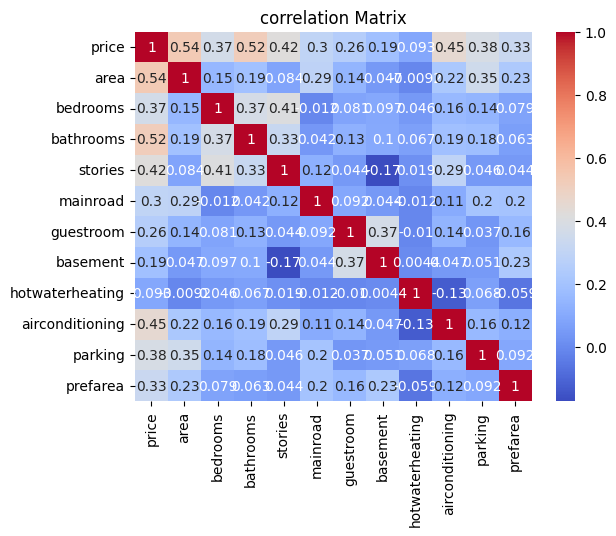

In [39]:
#correlation matix to understand feature relationships
correlation_matrix = housing.corr()
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm')
plt.title("correlation Matrix")
plt.show()

In [40]:
#preprocessing: Selecting feature and target variable
X = housing[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','parking']]
y = housing['price']

In [44]:
#splitting the dataset into training and testing sets


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [45]:
#building the linear Regression Model

model = LinearRegression()

#fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [46]:
#Model Evaluation
y_pred = model.predict(X_test)

#mean squared error and R-squared for model evalution
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:",mse)
print("R-squared:",r2)

Mean Squared Error: 2182877314025.211
R-squared: 0.5681379014175727


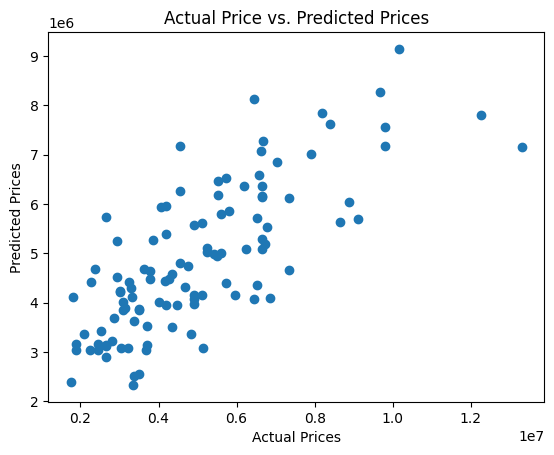

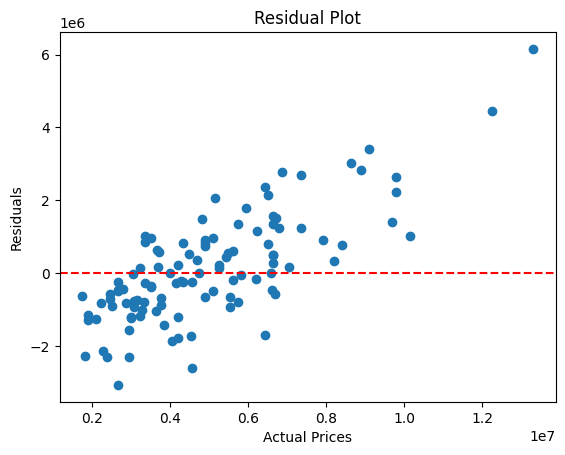

Predicted Price: 3924391592.455737


c:\Users\rajsu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
#predictions and visualization
#to visualize the predintions against actual prices,we'all use a scatter plot
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs. Predicted Prices")
plt.show()

#we can also create a residual plot to check the model's performance
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red',linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


# Lastly, let's use the trained model to make predictions on new data and visualize the results
new_data = [[3, 2, 1500, 4000, 1, 0, 0, 3]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])